In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 18

In [2]:
cd ~/Dropbox/volatileValues/simple_rt_experiment_probabilityC/experimental_parameters/

/Users/Krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/experimental_parameters


In [3]:
#conflict as reward probabilities
n_trials, n_targets = 1000, 2
hc_p, mc_p, lc_p = .65, .75, .85
# hc_p, mc_p, lc_p = 1, 1, 1

# #initialize uniform dist.  
# lc_uni_dist = np.random.uniform(0, 1, n_trials)
# mc_uni_dist = np.random.uniform(0,1,n_trials)
# hc_uni_dist = np.random.uniform(0,1,n_trials)

# lc_rewarding_target = lc_uni_dist <= lc_p
# mc_rewarding_target = mc_uni_dist <= mc_p
# hc_rewarding_target = hc_uni_dist <= hc_p

#make sure p = stated above 
# while (sum(lc_rewarding_target)/n_trials) != lc_p: 
#     lc_uni_dist = np.random.uniform(0, 1, n_trials)
#     lc_rewarding_target = lc_uni_dist <= lc_p

# while (sum(mc_rewarding_target)/n_trials) != mc_p: 
#     mc_uni_dist = np.random.uniform(0, 1, n_trials)
#     mc_rewarding_target = mc_uni_dist <= mc_p
    
# while (sum(hc_rewarding_target)/n_trials) != hc_p: 
#     hc_uni_dist = np.random.uniform(0, 1, n_trials)
#     hc_rewarding_target = hc_uni_dist <= hc_p
    
lc_binary_t0, lc_binary_t1 = np.zeros((n_trials)), np.zeros((n_trials))
mc_binary_t0, mc_binary_t1 = np.zeros((n_trials)), np.zeros((n_trials))
hc_binary_t0, hc_binary_t1 = np.zeros((n_trials)), np.zeros((n_trials))

mc_binary_t1 = np.zeros((n_trials))
for t in np.arange(0,n_trials):
    test_dist = np.random.uniform()
    if test_dist < mc_p: 
        mc_binary_t1[t]=1
    else: 
        mc_binary_t1[t]=0

mc_binary_t0[mc_binary_t1 == 0] = 1
mc_binary_t0 = mc_binary_t0 > 0 
mc_binary_t1 = mc_binary_t1 > 0 


lc_binary_t1 = np.zeros((n_trials))
for t in np.arange(0,n_trials):
    test_dist = np.random.uniform(0, 1, 1)
    if test_dist < lc_p: 
        lc_binary_t1[t]=1
    else: 
        lc_binary_t1[t]=0

lc_binary_t0[lc_binary_t1 == 0] = 1
lc_binary_t0 = lc_binary_t0 > 0 
lc_binary_t1 = lc_binary_t1 > 0 

hc_binary_t1 = np.zeros((n_trials))
for t in np.arange(0,n_trials):
    test_dist = np.random.uniform(0, 1, 1)
    if test_dist < hc_p: 
        hc_binary_t1[t]=1
    else: 
        hc_binary_t1[t]=0
hc_binary_t0[hc_binary_t1 == 0] = 1
hc_binary_t0 = hc_binary_t0 > 0 
hc_binary_t1 = hc_binary_t1 > 0 

print('lc_p(rewarding_target) :', np.sum(lc_binary_t1)/n_trials)
print('lc_p(rewarding_target) :', np.sum(lc_binary_t0)/n_trials)

print('mc_p(rewarding_target) :', np.sum(mc_binary_t1)/n_trials)
print('hc_p(rewarding_target) :', np.sum(hc_binary_t1)/n_trials)

# hc_binary_t1, hc_binary_t2 = np.zeros((n_trials)), np.zeros((n_trials))
# mc_binary_t1, mc_binary_t2 = np.zeros((n_trials)), np.zeros((n_trials))
# lc_binary_t1, lc_binary_t2 = np.zeros((n_trials)), np.zeros((n_trials))

# np.random.shuffle(lc_rewarding_target)
# np.random.shuffle(mc_rewarding_target)
# np.random.shuffle(hc_rewarding_target)

# hc_binary_t1[hc_rewarding_target] = 1
# hc_binary_t2[~hc_rewarding_target] = 1

# mc_binary_t1[mc_rewarding_target] = 1
# mc_binary_t2[~mc_rewarding_target] = 1

# lc_binary_t1[lc_rewarding_target] = 1
# lc_binary_t2[~lc_rewarding_target] = 1

lc_p(rewarding_target) : 0.845
lc_p(rewarding_target) : 0.155
mc_p(rewarding_target) : 0.743
hc_p(rewarding_target) : 0.634


(0.5, 1.01)

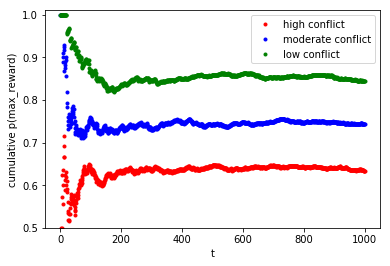

In [4]:
t_range = np.arange(1,n_trials+1)
hc_cumulative_p = np.cumsum(hc_binary_t1)/t_range
mc_cumulative_p = np.cumsum(mc_binary_t1)/t_range
lc_cumulative_p = np.cumsum(lc_binary_t1)/t_range
plt.plot(hc_cumulative_p, 'r.', label='high conflict')
plt.plot(mc_cumulative_p, 'b.', label='moderate conflict')
plt.plot(lc_cumulative_p, 'g.', label='low conflict')
plt.legend()
plt.ylabel('cumulative p(max_reward)')
plt.xlabel('t')
plt.ylim([0.5,1.01])

In [5]:
#reward values 
r_mu = 3
r_std = 1 
hc_rewards = np.random.normal(loc=r_mu, scale=r_std, size=n_trials)
mc_rewards = np.random.normal(loc=r_mu, scale=r_std, size=n_trials)
lc_rewards = np.random.normal(loc=r_mu, scale=r_std, size=n_trials)

hc_rewards_t1 = np.zeros(hc_binary_t1.shape)
mc_rewards_t1 = np.zeros(mc_binary_t1.shape)
lc_rewards_t1 = np.zeros(lc_binary_t1.shape)

hc_rewards_t2 = np.zeros_like(hc_rewards_t1)
mc_rewards_t2 = np.zeros_like(mc_rewards_t1)
lc_rewards_t2 = np.zeros_like(lc_rewards_t1)

hc_rewards_t1[hc_binary_t1==1] = hc_rewards[hc_binary_t1]
hc_rewards_t2[~hc_binary_t1] = hc_rewards[~hc_binary_t1]

mc_rewards_t1[mc_binary_t1] = mc_rewards[mc_binary_t1]
mc_rewards_t2[~mc_binary_t1] = mc_rewards[~mc_binary_t1]

lc_rewards_t1[lc_binary_t1] = lc_rewards[lc_binary_t1]
lc_rewards_t2[~lc_binary_t1] = lc_rewards[~lc_binary_t1]

In [6]:
#volatility 
lv_lambda, mv_lambda, hv_lambda = 30, 20, 10
lv_size, mv_size, hv_size = int(n_trials/lv_lambda),int(n_trials/mv_lambda),  int(n_trials/hv_lambda)

In [7]:
#find change point indices and slice to fit n_trials 
lv_lam = np.cumsum(np.random.poisson(lam=lv_lambda,size=lv_size))
mv_lam = np.cumsum(np.random.poisson(lam=mv_lambda,size=mv_size))
hv_lam = np.cumsum(np.random.poisson(lam=hv_lambda,size=hv_size))

hv_lam = hv_lam[hv_lam < n_trials]
mv_lam = mv_lam[mv_lam < n_trials]
lv_lam = lv_lam[lv_lam < n_trials]

In [8]:
lc_reward_arr = np.transpose(np.array((lc_rewards_t1, lc_rewards_t2)))
mc_reward_arr = np.transpose(np.array((mc_rewards_t1, mc_rewards_t2)))
hc_reward_arr = np.transpose(np.array((hc_rewards_t1, hc_rewards_t2)))

In [9]:
#also write generative ps 
lc_rewards_flipped = np.array([lc_reward_arr[n,::-1] if np.sum(n>=mv_lam)%2 else lc_reward_arr[n,:] for n in range(len(lc_reward_arr))])

mc_rewards_flipped = np.array([mc_reward_arr[n,::-1] if np.sum(n>=mv_lam)%2 else mc_reward_arr[n,:] for n in range(len(mc_reward_arr))])

mc_rewards_flipped_lv = np.array([mc_reward_arr[n,::-1] if np.sum(n>=lv_lam)%2 else mc_reward_arr[n,:] for n in range(len(mc_reward_arr))])

mc_rewards_flipped_hv = np.array([mc_reward_arr[n,::-1] if np.sum(n>=hv_lam)%2 else mc_reward_arr[n,:] for n in range(len(mc_reward_arr))])

hc_rewards_flipped = np.array([hc_reward_arr[n,::-1] if np.sum(n>=mv_lam)%2 else hc_reward_arr[n,:] for n in range(len(hc_reward_arr))])

In [10]:
#observed reward-identity changes (not "real" changepoints)
#conflict conditions
lc_obs_cp_vec = np.zeros((n_trials))
mc_obs_cp_vec = np.zeros((n_trials))
mc_obs_cp_vec_lv = np.zeros((n_trials))
mc_obs_cp_vec_hv = np.zeros((n_trials))
hc_obs_cp_vec = np.zeros((n_trials))

lc_rewards_flipped_vec = lc_rewards_flipped != 0 
mc_rewards_flipped_vec = mc_rewards_flipped != 0 
mc_rewards_flipped_vec_lv = mc_rewards_flipped_lv != 0 
mc_rewards_flipped_vec_hv = mc_rewards_flipped_hv != 0 
hc_rewards_flipped_vec = hc_rewards_flipped != 0 

lc_obs_cp_idx = np.where(lc_rewards_flipped_vec[:-1] != lc_rewards_flipped_vec[1:])[0]
mc_obs_cp_idx = np.where(mc_rewards_flipped_vec[:-1] != mc_rewards_flipped_vec[1:])[0]
mc_obs_cp_idx_lv = np.where(mc_rewards_flipped_vec_lv[:-1] != mc_rewards_flipped_vec_lv[1:])[0]
mc_obs_cp_idx_hv = np.where(mc_rewards_flipped_vec_hv[:-1] != mc_rewards_flipped_vec_hv[1:])[0]
hc_obs_cp_idx = np.where(hc_rewards_flipped_vec[:-1] != hc_rewards_flipped_vec[1:])[0]


lc_obs_cp_vec[lc_obs_cp_idx+1] = 1
mc_obs_cp_vec[mc_obs_cp_idx+1] = 1
mc_obs_cp_vec_lv[mc_obs_cp_idx_lv+1] = 1
mc_obs_cp_vec_hv[mc_obs_cp_idx_hv+1] = 1
hc_obs_cp_vec[hc_obs_cp_idx+1] = 1

In [11]:
#mark trials with cp indicator
lv_cp_vec = np.zeros((n_trials), dtype=bool)
mv_cp_vec = np.zeros((n_trials), dtype=bool)
hv_cp_vec = np.zeros((n_trials), dtype=bool)

lv_cp_vec[lv_lam] = 1
mv_cp_vec[mv_lam] = 1
hv_cp_vec[hv_lam] = 1

In [12]:
cp_lv_epoch_idx = list(np.where(lv_cp_vec == 1)[0])
cp_lv_epoch_idx.insert(0,0)
cp_lv_epoch_idx.append(1000)
cp_hv_epoch_idx = list(np.where(hv_cp_vec == 1)[0])
cp_hv_epoch_idx.insert(0,0)
cp_hv_epoch_idx.append(1000)
cp_mv_epoch_idx = list(np.where(mv_cp_vec == 1)[0])
cp_mv_epoch_idx.insert(0,0)
cp_mv_epoch_idx.append(1000)

cp_lv_epoch_len = np.diff(cp_lv_epoch_idx)
cp_mv_epoch_len = np.diff(cp_mv_epoch_idx)
cp_hv_epoch_len = np.diff(cp_hv_epoch_idx)

In [13]:
#calculate cumulative prob. for each epoch 
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 18
#need to set reshape value to actual cps 
hc_test = []
lc_test = []
hv_test = []
lv_test = []

for epoch in range(len(cp_mv_epoch_len)):
    hc_test.append(np.cumsum((hc_rewards_flipped[cp_mv_epoch_idx[epoch]:
cp_mv_epoch_idx[epoch+1],0] > 0))
              /np.arange(1,cp_mv_epoch_len[epoch]+1))
    
for epoch in range(len(cp_mv_epoch_len)):
    lc_test.append(np.cumsum((lc_rewards_flipped[cp_mv_epoch_idx[epoch]:
cp_mv_epoch_idx[epoch+1],0] > 0))
              /np.arange(1,cp_mv_epoch_len[epoch]+1))
    
    
for epoch in range(len(cp_lv_epoch_len)):
    lv_test.append(np.cumsum((mc_rewards_flipped_lv[cp_lv_epoch_idx[epoch]:
cp_lv_epoch_idx[epoch+1],0] > 0))
              /np.arange(1,cp_lv_epoch_len[epoch]+1))
    
for epoch in range(len(cp_hv_epoch_len)):
    hv_test.append(np.cumsum((mc_rewards_flipped_hv[cp_hv_epoch_idx[epoch]:
cp_hv_epoch_idx[epoch+1],0] > 0))
              /np.arange(1,cp_hv_epoch_len[epoch]+1))

peak_p_reward_hc = [epoch[-1] for epoch in hc_test]
peak_p_reward_lc = [epoch[-1] for epoch in lc_test]
peak_p_reward_hv = [epoch[-1] for epoch in hv_test]
peak_p_reward_lv = [epoch[-1] for epoch in lv_test]


print(np.mean(peak_p_reward_hc[::2]), np.mean(peak_p_reward_lc[::2]), 
np.mean(peak_p_reward_lv[::2]), np.mean(peak_p_reward_hv[::2]))
# plt.plot(peak_p_reward_lc[::2], 'b.-')
# plt.plot(peak_p_reward_lc[1::2], 'r-.')
# plt.plot(peak_p_reward_hc[::2], 'b.-')
# plt.plot(peak_p_reward_hc[1::2], 'r-.')

lc_cprob_epoch = np.hstack(lc_test).flatten()
hc_cprob_epoch = np.hstack(hc_test).flatten()
hv_cprob_epoch = np.hstack(hv_test).flatten()
lv_cprob_epoch = np.hstack(lv_test).flatten()

# plt.plot(lc_cprob_epoch, '.-')
# plt.axhline(lc_p, color='k', alpha=.5)
# plt.axhline(1-lc_p, color='k', alpha=.5)

0.6435586456563034 0.8305099186147108 0.7400724410420685 0.7691230658358685


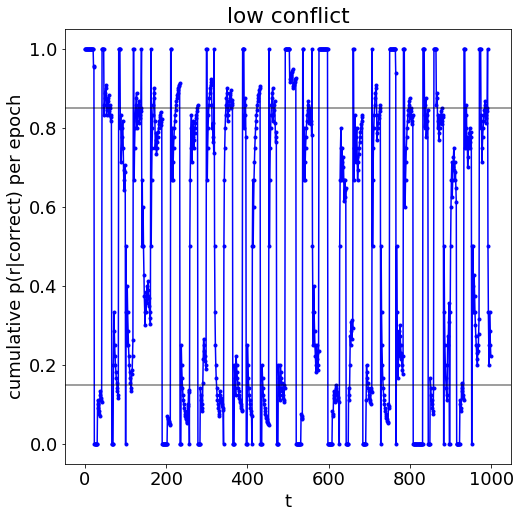

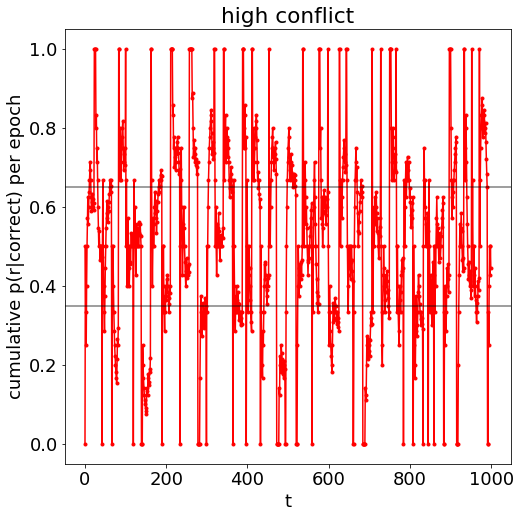

In [19]:
plt.plot(lc_cprob_epoch, 'b.-')
plt.axhline(lc_p, alpha = 0.5, color='k')
plt.axhline(1-lc_p, alpha = 0.5, color='k')
plt.title('low conflict')
plt.xlabel('t')
plt.ylabel('cumulative p(r|correct) per epoch')
plt.show()
plt.plot(hc_cprob_epoch, 'r.-')
plt.title('high conflict')
plt.xlabel('t')
plt.ylabel('cumulative p(r|correct) per epoch')
plt.axhline(hc_p, alpha = 0.5, color='k')
plt.axhline(1-hc_p, alpha = 0.5, color='k')
plt.show()

In [15]:
#print 
filename = 'test_highC'
taskParameters = np.array((hc_rewards_flipped[:,0], hc_rewards_flipped[:,1], hc_cumulative_p, hc_cprob_epoch, mv_cp_vec, hc_obs_cp_vec))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, c_prob_epoch, cp, obs_cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')

filename = 'test_lowC'
taskParameters = np.array((lc_rewards_flipped[:,0],  lc_rewards_flipped[:,1], lc_cumulative_p, lc_cprob_epoch, mv_cp_vec, lc_obs_cp_vec))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, c_prob_epoch, cp, obs_cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')

filename = 'test_lowV'
taskParameters = np.array(( mc_rewards_flipped_lv[:,0], mc_rewards_flipped_lv[:,1], mc_cumulative_p,lv_cprob_epoch, lv_cp_vec, mc_obs_cp_vec_lv))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, c_prob_epoch, cp, obs_cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')

filename = 'test_highV'
taskParameters = np.array(( mc_rewards_flipped_hv[:,0], mc_rewards_flipped_hv[:,1], mc_cumulative_p,hv_cprob_epoch, hv_cp_vec, mc_obs_cp_vec_hv))
taskParameters = np.matrix.transpose(taskParameters)
header = ("r_t1, r_t2, c_prob, c_prob_epoch, cp, obs_cp") 
np.savetxt(filename + '.csv',taskParameters, header = header, delimiter=',', comments = '', fmt='%f')

In [16]:
#performance criterion for 80/20 p. in frank's task is .65 choosing high val., .5 for 60/40 
#values from Frank, Worack, & Curran 2005 

frank_lc_crit_highVal = .65
frank_lc_crit_lowVal = 1 - frank_lc_crit_highVal
lc_p_highVal = .85 
lc_p_lowVal = 1-lc_p_highVal 

frank_hc_crit_highVal = .5
frank_hc_crit_lowVal = 1 - frank_hc_crit_highVal
hc_p_highVal = .65
hc_p_lowVal = 1-hc_p_highVal 

pts_per_trial = 3
total_cost = -1*n_trials 


hv_target_pts_lc = frank_lc_crit_highVal*lc_p_highVal*(n_trials*pts_per_trial)
lv_target_pts_lc = frank_lc_crit_lowVal*lc_p_lowVal*(n_trials*pts_per_trial)

hv_target_pts_hc = frank_hc_crit_highVal*hc_p_highVal*(n_trials*pts_per_trial)
lv_target_pts_hc = frank_hc_crit_lowVal*hc_p_lowVal*(n_trials*pts_per_trial)

expected_val_lc = hv_target_pts_lc + lv_target_pts_lc + total_cost
expected_val_hc = hv_target_pts_hc + lv_target_pts_hc + total_cost

print('expected_val low conflict ', expected_val_lc,'\nexpected_val high conflict ', expected_val_hc)

expected_val low conflict  815.0 
expected_val high conflict  500.0
